# Plotting 101 + Saving You Some Time Spent Googling

The purpose of this talk is to go over some extremely basic plotting commands and customization options. Some will be obvious to anyone learning Python, and others will be ones I've had to look up on Google.


### <font color='red'>Disclaimers</font>

I am not an expert. All plots are illustrative and are not intended to be examples of "good" plotting practices. I **do not** recommend the naming scheme I use below (axes, axes2, axes3, ...), but used it for convenience here. Use creative and informative variable names whenever possible. Finally, all code was thrown together over ~2 days time from many, many old plotting scripts for a variety of projects/papers. Command+c, command+v at your own risk.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from astropy import constants as const
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import container
import sys
sys.path.insert(1, '/Users/christine/Desktop/Research/APOGEE_Project/modules')
import data_cuts_module_dr14 as dcm
import plotter_defaults_module
plt.rcParams.update({'figure.autolayout':'False'})

## rcParams
rcParams provide an easy way to implement script-wide updates to your plot settings. As an example, here are the updates from the "plotter_defaults_module.py" that are shown in the plots you'll see below:

``` python
import matplotlib.pyplot as plt

plt.rcdefaults()
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
# My own adds to Dr. Badenes' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})
# To use my system's LaTEX rather than matplotlib's version--may give better results, but it's slower
#plt.rcParams.update({'text.usetex': 'True'})```

I can overrule these defaults for any given plot; they're just the defaults that matplotlib.pyplot will use.

For more info and to check out the _many_ other rcParam options, scroll through https://matplotlib.org/users/customizing.html.

In [2]:
# Import data
filepath = '/Users/christine/Desktop/Research/APOGEE_Project/'

jtdata = pd.read_csv(filepath+'jamie_tayar_vsini/RV14out_vsini1.txt', skiprows=1, header=None, sep='\s+', engine='python', names=['APOGEE_ID', 'teff', 'logg', 'feh', 'alphafe', 'drvmax', 'vsinij', 'vsinierr', 'vsinia'], usecols=[0,1,2,3,4,5,6,7,8])

dr14_data = pd.read_csv(filepath+'apogee_DR14/DR14_RG_uncalibvals_nodups_wdereddened_w-elems_radec.csv', header=None, names=['APOGEE_ID', '[Fe/H]', '[alpha/H]', '[M/H]', 'Teff', 'log(g)', 'J0', 'H0', 'K0', 'DRVM'], usecols=[0,7,8,9,10,11,23,24,25,26])
dr14_noRC = dcm.clean_RC(dr14_data)

sb2s_all = pd.read_csv(filepath+'apogee_DR14/sb2s_marina/dr14_sb2.txt', sep='\s+', header=0, engine='python')
dr14_sb2free = dr14_noRC[~dr14_noRC['APOGEE_ID'].isin(sb2s_all['APOGEE_ID'])]

both_apjt = pd.merge(dr14_sb2free, jtdata, how='inner', on='APOGEE_ID')
print('Number of stars in JT and AP data:', len(both_apjt))

Number of stars in JT and AP data: 107737


## Your Standard Plot, with a Few Customizable Options

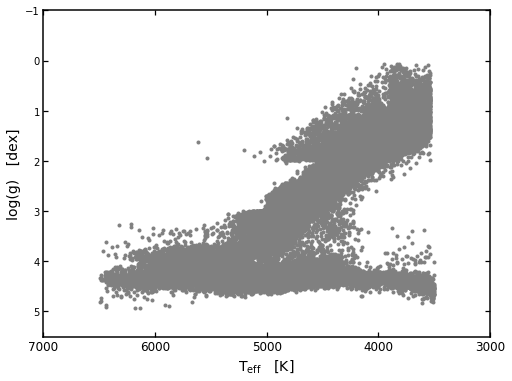

In [3]:
fig, axes = plt.subplots(1,1, figsize = [8, 6])

axes.plot(both_apjt['Teff'], both_apjt['log(g)'], ls='None', marker='.', color='gray', 
          rasterized=True)

axes.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes.set_ylabel(r'log(g)   [dex]', fontsize=14)

axes.set_xticks([3000, 4000, 5000, 6000, 7000])
axes.set_xticklabels([3000, 4000, 5000, 6000, 7000], {'fontsize': 12})
axes.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
# axes.set_yticklabels([])

axes.set_xlim(3000,7000)
axes.set_ylim(-1,5.5)

# Flip the x and y axis to match what the literature typically does
fig.gca().invert_xaxis()
fig.gca().invert_yaxis()

plt.show()

## Plot Within a Plot
While this can look _very_ cool, it can also be completely unnecessary and also result in weird aspect ratios that distort your data. So, you know, use at your own risk, and best of luck convincing your advisor it's totally worthy of being put in a paper.

Important commands:

```python
inset = fig.add_axes([lc, bc, w, h])
inset.hist()
# or any other plotting command
```

**Note: The plot below is a terrible use of an inset and is being shown for purely illustrative purposes.**

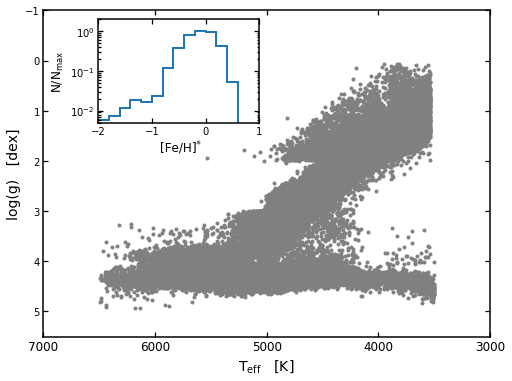

In [4]:
fig2, axes2 = plt.subplots(1,1, figsize = [8, 6])
axes2.plot(both_apjt['Teff'], both_apjt['log(g)'], ls='None', marker='.', color='gray', 
           rasterized=True)
axes2.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes2.set_ylabel(r'log(g)   [dex]', fontsize=14)
axes2.set_xticks([3000, 4000, 5000, 6000, 7000])
axes2.set_xticklabels([3000, 4000, 5000, 6000, 7000], {'fontsize': 12})
axes2.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes2.set_xlim(3000,7000)
axes2.set_ylim(-1,5.5)
# Flip the x and y axis to match what the literature typically does
fig2.gca().invert_xaxis()
fig2.gca().invert_yaxis()


# 1) left corner placement, relative to the left-hand side, in normalized axes units (INAU)
# 2) left corner placement, relative to the bottom of the plot, INAU
# 3) width INAU
# 4) height INAU
inset = fig2.add_axes([0.22, .62, .28, .24])

hist, bins = np.histogram(both_apjt['[Fe/H]'], bins=np.linspace(-2,1,16))
weights = np.ones(len(both_apjt))/float(np.max(hist))

inset.hist(both_apjt['[Fe/H]'], bins=np.linspace(-2,1,16), weights=weights, 
           histtype='step', linewidth=2)

inset.set_xlabel(r'[Fe/H]', fontsize=12)
inset.set_ylabel(r'$N/N_{max}$', fontsize=12)
inset.set_xlim(-2,1)
inset.set_ylim(5e-3,2e0)
inset.set_yscale('log', basey=10)

plt.show()

## Contour Plots
These are very useful for showing regions of interest. Thousands of scatter points (like the plot above, which has ~100,000) can blend together and make it hard to distinguish a moderately filled area from an extremely busy area in parameter space.

Important commands:

```python
axes.contour(hist, extent=[xmin, xmax, ymin, ymax], levels=[], colors=[])
axes.contourf(hist, extent=[xmin, xmax, ymin, ymax], levels=[], colors=[])
```

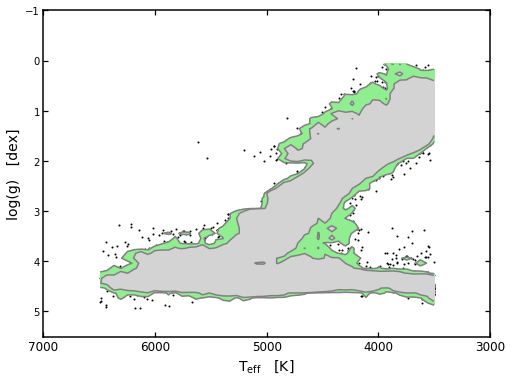

In [5]:
# Quick hist to base the contour lines on
simpler_hist, xs, ys = np.histogram2d(both_apjt['Teff'], both_apjt['log(g)'], bins=50)

fig3, axes3 = plt.subplots(1,1, figsize = [8, 6])
# Scatter points
axes3.plot(both_apjt['Teff'], both_apjt['log(g)'], ls='None', marker='.', 
           ms=2, color='black', rasterized=True, zorder=1)
# Establish the contour lines--here, 68% and 99% confidence regions
axes3.contour(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
              levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2)], 
              colors='gray', zorder=3)
# Fill in the contour lines 
axes3.contourf(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
               levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2), 1e5], 
               colors=['lightgreen', 'lightgray'], zorder=2)

# Remainder of plot settings
axes3.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes3.set_ylabel(r'log(g)   [dex]', fontsize=14)
axes3.set_xticks([3000, 4000, 5000, 6000, 7000])
axes3.set_xticklabels([3000, 4000, 5000, 6000, 7000], {'fontsize': 12})
axes3.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes3.set_xlim(3000,7000)
axes3.set_ylim(-1,5.5)
# Flip the x and y axis to match what the literature typically does
fig3.gca().invert_xaxis()
fig3.gca().invert_yaxis()

## That SDSS Paper Plot You Keep Seeing?
Yes, you read that right. Turns out it isn't too hard, but knowing what functions would do what properly did take me a little bit of time. This is a place where the function `plt.hist2d` is much more convenient to work with than `plt.imshow` (which I demonstrate futher down). Its optional `cmin=yournum` keyword will only plot bins that have values above the `yournum` threshold.

Important commands:

```python
axes.plot(x, y, **kwargs, zorder=1)
axes.contour(hist, extent=[xmin, xmax, ymin, ymax], levels=[], colors=[], zorder=3)
axes.contourf(hist, extent=[xmin, xmax, ymin, ymax], levels=[], colors=[], zorder=2)
axes.hist2d(x, y, bins=[], range=[[],[]], cmin=num, zorder=4)
```

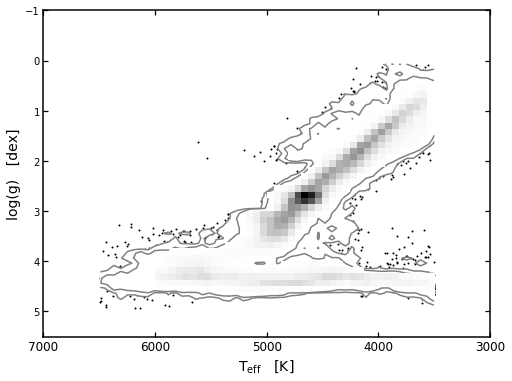

In [8]:
fig4, axes4 = plt.subplots(1,1, figsize = [8, 6])
# These three are the same as before except for the contours being filled with white
axes4.plot(both_apjt['Teff'], both_apjt['log(g)'], ls='None', marker='.', 
           ms=2, color='black', rasterized=True, zorder=1)
axes4.contour(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
              levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2)], 
              colors='gray', zorder=3)
axes4.contourf(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
               levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2), 1e4], 
               colors=['white', 'white'], zorder=2)

# Bins for the 2D histogram
xbins_sdss = np.linspace(3500, 6000, 41)
ybins_sdss = np.linspace(0,5,41)

# Histogram plotting command
axes4.hist2d(both_apjt['Teff'], both_apjt['log(g)'], bins=[xbins_sdss, ybins_sdss], 
             range=[[3500,6000],[0.0,5.0]], cmin=25, cmap='Greys', zorder=4)

axes4.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes4.set_ylabel(r'log(g)   [dex]', fontsize=14)
axes4.set_xticks([3000, 4000, 5000, 6000, 7000])
axes4.set_xticklabels([3000, 4000, 5000, 6000, 7000], {'fontsize': 12})
axes4.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes4.set_xlim(3000,7000)
axes4.set_ylim(-1,5.5)
# Flip the x and y axis to match what the literature typically does
fig4.gca().invert_xaxis()
fig4.gca().invert_yaxis()

## Colorbar Plots
Colorbars are an awesome way to add extra dimensionality to your plots without cluttering them. There's quite a lot of customization you can do with them, too!
### The basics: plt.scatter
Change the size of points with the `s` keyword. The `c` keyword is what the colorbar will color based on, and you can change the colormap with `cmap`. For a listing of `matplotlib.pyplot` colormaps, check out https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html. The ticks and label for the colorbar are assigned separately of the `plt.scatter` command, as shown below. You can rotate the tick labels and colorbar labels so they face the direction you'd like.

Important commands:

```python
scat = axes.scatter(x, y, s=num, c=z, **kwargs)
cbar = fig.colorbar(scat, **kwargs)
cbar.set_label('Label string', **kwargs)
```

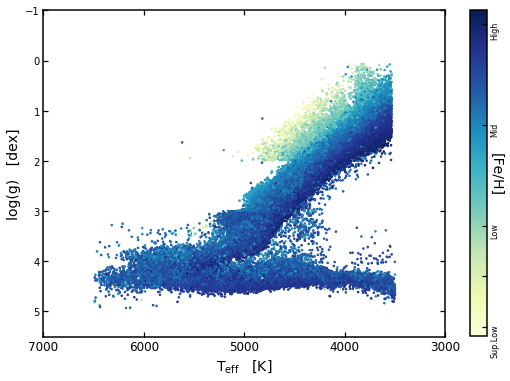

In [9]:
fig5, axes5 = plt.subplots(1,1, figsize = [9, 6])

hrdiag = axes5.scatter(both_apjt['Teff'], both_apjt['log(g)'], s=2.5, 
                       c=both_apjt['[Fe/H]'], cmap='YlGnBu', rasterized=True)

cbar = fig5.colorbar(hrdiag, ticks=[-2.5, -2, -1.5, -0.5, 0.5])
cbar.set_label('[Fe/H]', fontsize=14, rotation=270)
cbar.ax.set_yticklabels(['Sup.Low', '', 'Low', 'Mid', 'High'], fontsize=8, rotation=90)

axes5.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes5.set_ylabel(r'log(g)   [dex]', fontsize=14)

axes5.set_xticks([3000, 4000, 5000, 6000, 7000])
axes5.set_xticklabels([3000, 4000, 5000, 6000, 7000], {'fontsize': 12})
axes5.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])

axes5.set_xlim(3000,7000)
axes5.set_ylim(-1,5.5)

# Flip the x and y axis to match what the literature typically does
fig5.gca().invert_xaxis()
fig5.gca().invert_yaxis()

plt.show()

### Density plots + colorbars
Earlier, I used `plt.hist2d` for the density histogram. However, this time we'll use `plt.imshow`, which affords us a lot of flexibility. It can be a pain to get the extent and ticks right, so do make sure your plot is best represented this way before wrangling with it. You have been warned.

Important commands:

```python
img = axes.imshow(hist, extent=(xmin, xmax, ymin, ymax), origin='lower', aspect=num, **kwargs)

cbar = fig.colorbar(img, **kwargs)
```

In [10]:
xvals = [3500, 6000]
yvals = [0.0, 5]

xbins = np.linspace(3500., 6000., 11)
ybins = np.linspace(0., 5., 11)

full_ap_vals, _, _, = np.histogram2d(both_apjt['Teff'], both_apjt['log(g)'], 
                                     bins=[xbins, ybins], range=[xvals,yvals])
full_ap_vals = full_ap_vals.T
correct_direc = np.fliplr(np.flipud(full_ap_vals))

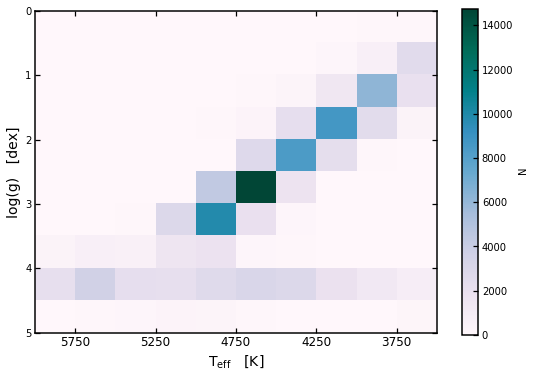

In [11]:
fig6, axes6 = plt.subplots(1,1, figsize = [9, 6])

dens = axes6.imshow(correct_direc, extent=(6000, 3500, 5.0, 0), origin='lower', 
                    aspect=400, interpolation='nearest', cmap='PuBuGn')

cbar_hist = fig6.colorbar(dens)
cbar_hist.set_label(r'$N$')

axes6.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes6.set_ylabel(r'log(g)   [dex]', fontsize=14)

axes6.set_xticks([3750, 4250, 4750, 5250, 5750])
axes6.set_xticklabels([3750, 4250, 4750, 5250, 5750], {'fontsize': 12})
axes6.set_yticks([0, 1.0, 2.0, 3.0, 4.0, 5.0])

plt.show()

### Log-scaling on your colorbar
The key differences here are calling `matplotlib.colors` in your packages, and then using the `norm` keyword.

Important commands:

```python
img = axes.imshow(hist, extent=(xmin, xmax, ymin, ymax), origin='lower', aspect=num, norm=norm=colors.LogNorm(vmin=notzero, vmax=whatever), **kwargs)

cbar = fig.colorbar(img, **kwargs)
```

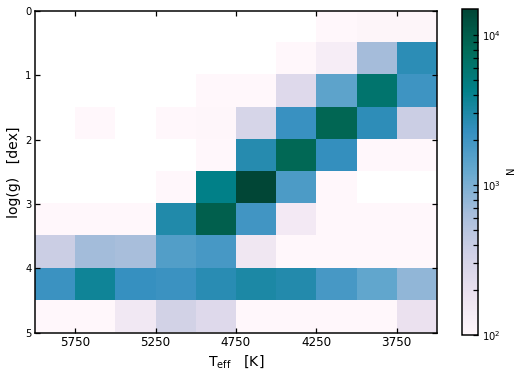

In [12]:
fig7, axes7 = plt.subplots(1,1, figsize = [9, 6])

dens2 = axes7.imshow(correct_direc, extent=(6000, 3500, 5.0, 0), origin='lower', 
                     aspect=400, interpolation='none', cmap='PuBuGn', 
                     norm=colors.LogNorm(vmin=100, vmax=15000))

cbar_log = fig7.colorbar(dens2)
cbar_log.set_label(r'$N$')

axes7.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes7.set_ylabel(r'log(g)   [dex]', fontsize=14)

axes7.set_xticks([3750, 4250, 4750, 5250, 5750])
axes7.set_xticklabels([3750, 4250, 4750, 5250, 5750], {'fontsize': 12})
axes7.set_yticks([0, 1.0, 2.0, 3.0, 4.0, 5.0])

plt.show()

### Adding a colorbar to the SDSS plot
The returns of `plt.hist2d` are (counts, xedges, yedges, Image). To add a colorbar, we need to pass the 4th component, Image, which is also what is returned by `plt.imshow`. It throws a warning, since `matplotlib.colors` doesn't handle the NaNs that likely came from the `cmin` keyword, but it still plots properly.

Important commands:

```python
axes.plot(x, y, **kwargs, zorder=1)
axes.contour(hist, extent=[xmin, xmax, ymin, ymax], levels=[], colors=[], zorder=3)
axes.contourf(hist, extent=[xmin, xmax, ymin, ymax], levels=[], colors=[], zorder=2)

hist_plt = axes.hist2d(x, y, bins=[], range=[[],[]], cmin=num, norm=norm=colors.LogNorm(vmin=notzero, vmax=whatever), zorder=4)

cbar = fig.colorbar(hist_plt[3])
```

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


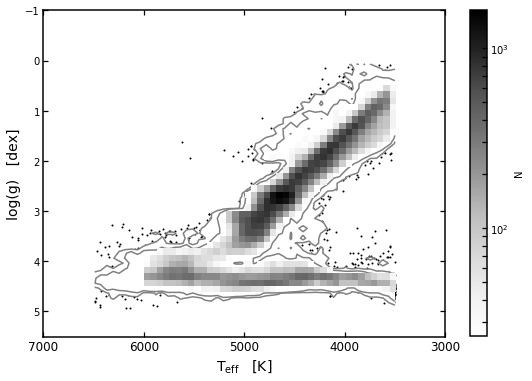

In [13]:
fig8, axes8 = plt.subplots(1,1, figsize = [9, 6])
# These three are the same as before except for the contours being filled with white
axes8.plot(both_apjt['Teff'], both_apjt['log(g)'], ls='None', marker='.', ms=2, 
           color='black', rasterized=True, zorder=1)
axes8.contour(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
              levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2)], 
              colors='gray', zorder=3)
axes8.contourf(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
               levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2), 1e4], 
               colors=['white', 'white'], zorder=2)

# Histogram plotting command
sdss_hist = axes8.hist2d(both_apjt['Teff'], both_apjt['log(g)'], 
                         bins=[xbins_sdss, ybins_sdss], range=[[3500,6000],[0.0,5.0]], 
                         cmin=25, cmap='Greys', norm=colors.LogNorm(), zorder=4)

cbar_sdss = fig8.colorbar(sdss_hist[3])
cbar_sdss.set_label(r'$N$')

axes8.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes8.set_ylabel(r'log(g)   [dex]', fontsize=14)
axes8.set_xticks([3000, 4000, 5000, 6000, 7000])
axes8.set_xticklabels([3000, 4000, 5000, 6000, 7000], {'fontsize': 12})
axes8.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes8.set_xlim(3000,7000)
axes8.set_ylim(-1,5.5)
# Flip the x and y axis to match what the literature typically does
fig8.gca().invert_xaxis()
fig8.gca().invert_yaxis()

## Multi-Panel Plotting
Sometimes you need more panels to show relevant information together. It's pretty easy to add panels, and there's a lot of customization you can do. Make sure your figure size makes sense for the number of panels and shape of your plot.

Important commands:

```python
fig, axes = plt.subplots(i, j, figsize=[figx, figy])
# Use plot commands for each plot panel, or you can loop through them
axes[i,j].plot()
```

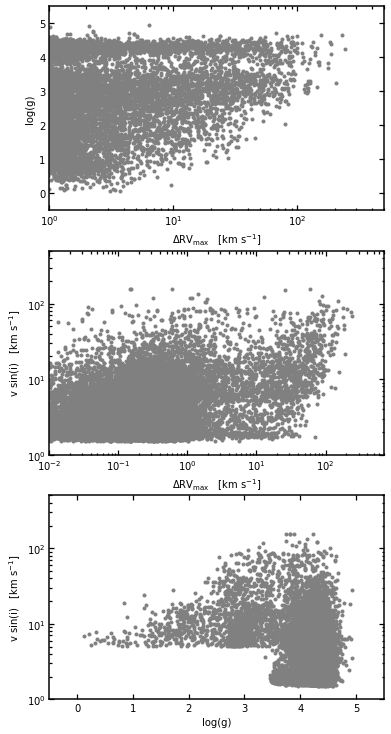

In [14]:
# Make sure your figsize is large enough to accomodate a colorbar
fig9, axes9 = plt.subplots(3,1, figsize=[6,12.75])

# 1st plot
axes9[0].plot(both_apjt['DRVM'], both_apjt['log(g)'], ls='none', marker='.', 
              color='gray', rasterized=True)
axes9[0].set_xlabel(r'$\Delta$RV$_{max}$   [km s$^{-1}$]')
axes9[0].set_ylabel(r'log(g)')
axes9[0].set_xlim(1,500)
axes9[0].set_ylim(-0.5,5.5)
axes9[0].set_xscale('log', basex=10)

# 2nd plot
axes9[1].plot(both_apjt['DRVM'], both_apjt['vsinij'], ls='none', marker='.', 
              color='gray', rasterized=True)
axes9[1].set_xlabel(r'$\Delta$RV$_{max}$   [km s$^{-1}$]')
axes9[1].set_ylabel(r'v sin(i)   [km s$^{-1}$]')
axes9[1].set_xlim(1e-2,700)
axes9[1].set_ylim(1,500)
axes9[1].set_xscale('log', basex=10)
axes9[1].set_yscale('log', basey=10)

# 3rd plot
axes9[2].plot(both_apjt['log(g)'], both_apjt['vsinij'], ls='none', marker='.', 
              color='gray', rasterized=True)
axes9[2].set_ylabel(r'v sin(i)   [km s$^{-1}$]')
axes9[2].set_xlabel(r'log(g)')
axes9[2].set_ylim(1,500)
axes9[2].set_xlim(-0.5,5.5)
axes9[2].set_yscale('log', basey=10)

plt.show()

### Sharing axes and making textboxes conform
Matching up axes is useful in certain cases and fortunately is pretty easy. As for textboxes, I found that lining up text on multiple plots was incredibly tedious. It meant lost minutes trying to guess the correct points on the x- and y-axis for each plot. It's not so bad if every plot runs from (0,5), (0,10)--maybe you place them at (x=4.5, y=9)--but it's much, much worse if each axes has a different range. Thankfully, there's a `transform` keyword that fixes this issue completely and took me way too long to discover. Simply supply the normalized x and y coordinates (i.e., 15% into the plot from the left and 80% up, so upper left corner, would mean 0.15, 0.8) and then add `transform=axes[i,j].transAxes` to your `plt.text` command.

Important commands:

```python
fig, axes = plt.subplots(i, j, sharex=True, sharey=True, figsize=[figx, figy])
# Use plot commands for each plot panel, or you can loop through them
axes[i,j].plot()
axes[i,j].text(lc, bc, 'string', transform=axes[i,j].transAxes)
```

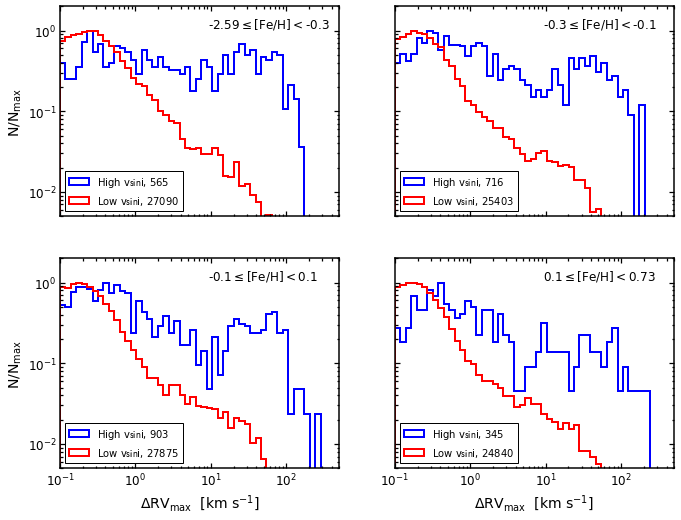

In [15]:
bounds = np.array([both_apjt['[Fe/H]'].min(), -0.3, -0.1, 0.1, both_apjt['[Fe/H]'].max()+0.1])
space = np.logspace(-1,2.6,num=51)

indices = [[0,0], [0,1], [1,0], [1,1]]

fig10, axes10 = plt.subplots(2,2, figsize=[11,8.5], sharex=True, sharey=True)

axes10[1,0].set_xlabel(r'$\Delta$RV$_{max}$  [km s$^{-1}$]', fontsize=14)
axes10[1,1].set_xlabel(r'$\Delta$RV$_{max}$  [km s$^{-1}$]', fontsize=14)
axes10[0,0].set_ylabel(r'$N/N_{max}$', fontsize=14)
axes10[1,0].set_ylabel(r'$N/N_{max}$', fontsize=14)

axes10[0,0].set_xlim(0.1,500)
axes10[0,0].set_ylim(5e-3,2e0)

axes10[0,0].set_xscale('log', basex=10)
axes10[0,0].set_yscale('log', basey=10)

axes10[1,0].tick_params(axis='x',labelsize=8)

for ival in range(len(bounds)-1):
    # Sample definition
    df_slice = both_apjt[(both_apjt['[Fe/H]'] >= bounds[ival] ) & 
                         (both_apjt['[Fe/H]'] < bounds[ival+1])]
    high_rot = df_slice[df_slice['vsinij'] >= 10.]
    low_rot = df_slice[df_slice['vsinij'] < 10.]
    
    # String definition
    feh_str = str(np.around(bounds[ival], decimals=2)) + r'$\leq [Fe/H] < $' + str(np.around(bounds[ival+1], decimals=2))
    
    # Histogram normalization
    hrot_hist, hrot_b = np.histogram(high_rot['DRVM'], bins=space)
    hrot_ws = np.ones(len(high_rot))/float(np.max(hrot_hist))
    lrot_hist, lrot_b = np.histogram(low_rot['DRVM'], bins=space)
    lrot_ws = np.ones(len(low_rot))/float(np.max(lrot_hist))
    
    # Yeah, I know. I'm taking suggestions for a better while still simple way to do this
    i = indices[ival]
    
    # Plot calls
    axes10[i[0], i[1]].hist(high_rot['DRVM'], bins=space, weights=hrot_ws, 
                            histtype='step', color='blue', linewidth=2, 
                            label=r'High $v\sin{i}$, '+str(len(high_rot)))
    axes10[i[0], i[1]].hist(low_rot['DRVM'], bins=space, weights=lrot_ws, 
                            histtype='step', color='red', linewidth=2, 
                            label=r'Low $v\sin{i}$, '+str(len(low_rot)))
    
    # Legend defintion
    axes10[i[0], i[1]].legend(fontsize='medium', ncol=1, numpoints=1, 
                              edgecolor='black', loc='lower left')
    
    # Setting the tick labels sizes via for loop, rather than having to define them all up top
    axes10[i[0],i[1]].tick_params(axis='x',labelsize=12)
    axes10[i[0],i[1]].tick_params(axis='y',labelsize=12)
    
    # Textbox additions
    axes10[i[0], i[1]].text(0.53, 0.9, feh_str, fontsize=12, 
                            transform=axes10[i[0], i[1]].transAxes)
    
plt.show()

## Multi-Panel Colorbar Plotting
We can use the `ax` keyword to determine which axes the colorbar will steal space from to exist. You can also create an axis specifically for it and then specify it using the `cax` keyword. Both ways of doing this are shown below.

Important commands:

```python
clrbarplt = axes[i,j].scatter(x, y, s=num, c=z, **kwargs)
cbar = fig.colorbar(clrbarplt,  ax=axes.ravel().tolist(), **kwargs)

axes[i+m,j+n].scatter(x2, y2, s=num2, c=z, **kwargs)
```

or 

```python
clrbarplt = axes[i,j].scatter(x, y, s=num, c=z, **kwargs)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([lc, bc, w, h])
cbar = fig.colorbar(clrbarplt, cax=cbar_ax)

axes[i+m,j+n].scatter(x2, y2, s=num2, c=z, **kwargs)
```

In [16]:
logg_ap = both_apjt['log(g)'].values.flatten()

gCGS = const.G.to('cm3 / (g s2)').value
mOne   = 1.989e33
loggvals_m1 = np.linspace(0,5,100)

drvpp_theory = 0.87 * ((gCGS * 10**loggvals_m1 * 1.3*mOne)**(0.25))/(1e5)
drvpp_13M = 0.87 * ((gCGS * 10**logg_ap * 1.3*mOne)**(0.25))/(1e5)

frac_from_max = both_apjt[both_apjt['DRVM'] > drvpp_13M]
both_apjt.insert(loc=7, column='theory_1_3Msun_DRVMpp', 
                 value=0.87 * ((gCGS * 10**both_apjt['log(g)'] * 1.3*mOne)**(0.25))/(1e5))
both_apjt.insert(loc=8, column='frac_from_max', 
                 value=both_apjt['DRVM']/both_apjt['theory_1_3Msun_DRVMpp'])

### Via ax keyword

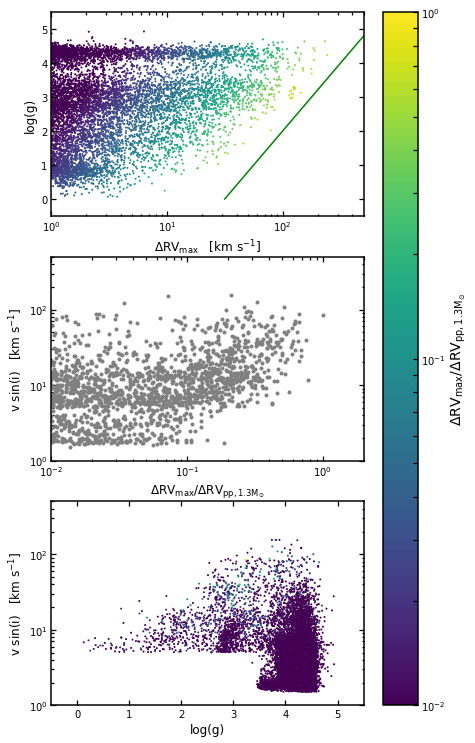

In [17]:
# Make sure your figsize is large enough to accomodate a colorbar
fig11, axes11 = plt.subplots(3,1, figsize=[7,12.75])

# Need this scatter plot command so that you can call it as the basis for the colorbar you'll add
drvmplt = axes11[0].scatter(both_apjt['DRVM'], both_apjt['log(g)'], s=4, 
                            marker='.', c=both_apjt['frac_from_max'], 
                            norm=colors.LogNorm(vmin=0.01, vmax=1.0), rasterized=True)
axes11[0].plot(drvpp_theory, loggvals_m1, ls='-', color='green')
axes11[0].set_xlabel(r'$\Delta$RV$_{max}$   [km s$^{-1}$]', fontsize=12)
axes11[0].set_ylabel(r'log(g)', fontsize=12)
axes11[0].set_xlim(1,500)
axes11[0].set_ylim(-0.5,5.5)
axes11[0].set_xscale('log', basex=10)

# Add the color bar via ax
cbar_frac = fig11.colorbar(drvmplt, ax=axes11.ravel().tolist())
cbar_frac.set_label(r'$\Delta$RV$_{max}$/$\Delta$RV$_{pp,1.3M_{\odot}}$', fontsize=14)
cbar_frac.ax.tick_params(axis='y',labelsize=10)

# Add your other plots--this plot does not rely on the colorbar
axes11[1].plot(both_apjt['frac_from_max'], both_apjt['vsinij'], ls='none', 
               marker='.', color='gray', rasterized=True)
axes11[1].set_xlabel(r'$\Delta$RV$_{max}$/$\Delta$RV$_{pp,1.3M_{\odot}}$', fontsize=12)
axes11[1].set_ylabel(r'v sin(i)   [km s$^{-1}$]', fontsize=12)
axes11[1].set_xlim(1e-2,2)
axes11[1].set_ylim(1,500)
axes11[1].set_xscale('log', basex=10)
axes11[1].set_yscale('log', basey=10)

# Add your other plots--this plot does use the colorbar from the top panel
axes11[2].scatter(both_apjt['log(g)'], both_apjt['vsinij'], s=4, marker='.', 
                  c=both_apjt['frac_from_max'], rasterized=True)
axes11[2].set_ylabel(r'v sin(i)   [km s$^{-1}$]', fontsize=12)
axes11[2].set_xlabel(r'log(g)', fontsize=12)
axes11[2].set_ylim(1,500)
axes11[2].set_xlim(-0.5,5.5)
axes11[2].set_yscale('log', basey=10)

plt.show()

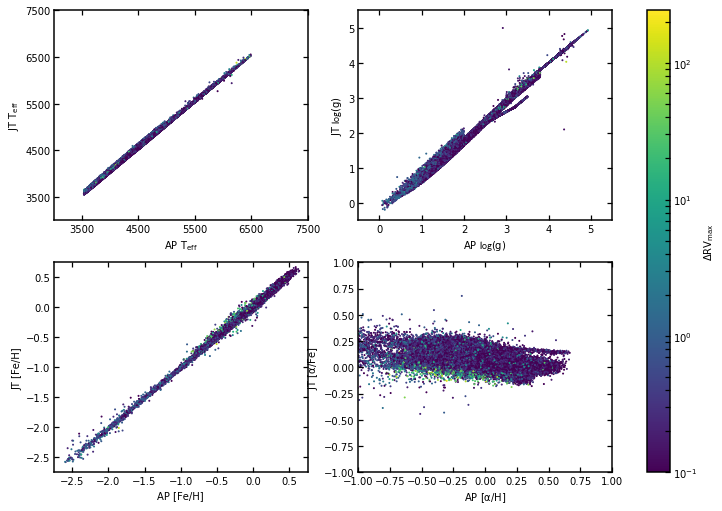

In [28]:
fig12, axes12 = plt.subplots(2,2, figsize=[12.5,8.5])

teffplt = axes12[0,0].scatter(both_apjt['Teff'], both_apjt['teff'], s=4, 
                              marker='.', c=both_apjt['DRVM'], 
                              norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), 
                              rasterized=True)

axes12[0,0].set_xlabel(r'AP T$_{eff}$')
axes12[0,0].set_ylabel(r'JT T$_{eff}$')
axes12[0,0].set_xlim(3000,7500)
axes12[0,0].set_ylim(3000,7500)
axes12[0,0].set_xticks([3500, 4500, 5500, 6500, 7500])
axes12[0,0].set_yticks([3500, 4500, 5500, 6500, 7500])

# Add the colorbar via ax
cbar_drvm = fig12.colorbar(teffplt, ax=axes12.ravel().tolist())
cbar_drvm.set_label(r'$\Delta$RV$_{max}$')

axes12[0,1].scatter(both_apjt['log(g)'], both_apjt['logg'], s=4, 
                    marker='.', c=both_apjt['DRVM'], 
                    norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), 
                    rasterized=True)
axes12[0,1].set_xlabel(r'AP $\log(g)$')
axes12[0,1].set_ylabel(r'JT $\log(g)$')
axes12[0,1].set_xlim(-0.5,5.5)
axes12[0,1].set_ylim(-0.5,5.5)

axes12[1,0].scatter(both_apjt['[Fe/H]'], both_apjt['feh'], s=4, 
                    marker='.', c=both_apjt['DRVM'], 
                    norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), 
                    rasterized=True)
axes12[1,0].set_xlabel(r'AP [Fe/H]')
axes12[1,0].set_ylabel(r'JT [Fe/H]')
axes12[1,0].set_xlim(-2.75,0.75)
axes12[1,0].set_ylim(-2.75,0.75)

axes12[1,1].scatter(both_apjt['[alpha/H]'], both_apjt['alphafe'], s=4, 
                    marker='.', c=both_apjt['DRVM'], 
                    norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), 
                    rasterized=True)
axes12[1,1].set_xlabel(r'AP [$\alpha$/H]')
axes12[1,1].set_ylabel(r'JT [$\alpha$/Fe]')
axes12[1,1].set_xlim(-1,1)
axes12[1,1].set_ylim(-1,1)

plt.show()

### Via cax keyword

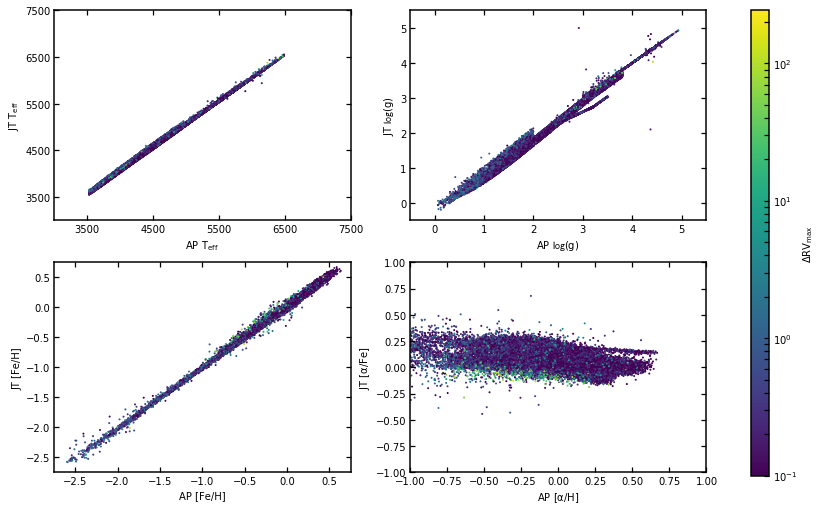

In [30]:
fig13, axes13 = plt.subplots(2,2, figsize=[12.5,8.5])

teffplt_alt = axes13[0,0].scatter(both_apjt['Teff'], both_apjt['teff'], s=4, marker='.', c=both_apjt['DRVM'], norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), rasterized=True)

axes13[0,0].set_xlabel(r'AP T$_{eff}$')
axes13[0,0].set_ylabel(r'JT T$_{eff}$')
axes13[0,0].set_xlim(3000,7500)
axes13[0,0].set_ylim(3000,7500)
axes13[0,0].set_xticks([3500, 4500, 5500, 6500, 7500])
axes13[0,0].set_yticks([3500, 4500, 5500, 6500, 7500])

# Add the colorbar via cax
fig13.subplots_adjust(right=0.85)
cbar_ax = fig13.add_axes([0.9, 0.12, 0.02, 0.76])
cbar_drvm_alt = fig13.colorbar(teffplt_alt, cax=cbar_ax)
cbar_drvm_alt.set_label(r'$\Delta$RV$_{max}$')

axes13[0,1].scatter(both_apjt['log(g)'], both_apjt['logg'], s=4, marker='.', c=both_apjt['DRVM'], norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), rasterized=True)
axes13[0,1].set_xlabel(r'AP $\log(g)$')
axes13[0,1].set_ylabel(r'JT $\log(g)$')
axes13[0,1].set_xlim(-0.5,5.5)
axes13[0,1].set_ylim(-0.5,5.5)

axes13[1,0].scatter(both_apjt['[Fe/H]'], both_apjt['feh'], s=4, marker='.', c=both_apjt['DRVM'], norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), rasterized=True)
axes13[1,0].set_xlabel(r'AP [Fe/H]')
axes13[1,0].set_ylabel(r'JT [Fe/H]')
axes13[1,0].set_xlim(-2.75,0.75)
axes13[1,0].set_ylim(-2.75,0.75)

axes13[1,1].scatter(both_apjt['[alpha/H]'], both_apjt['alphafe'], s=4, marker='.', c=both_apjt['DRVM'], norm=colors.LogNorm(vmin=0.1, vmax=both_apjt['DRVM'].max()), rasterized=True)
axes13[1,1].set_xlabel(r'AP [$\alpha$/H]')
axes13[1,1].set_ylabel(r'JT [$\alpha$/Fe]')
axes13[1,1].set_xlim(-1,1)
axes13[1,1].set_ylim(-1,1)

plt.show()